In [517]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [518]:
netflix_df = pd.read_csv('NetflixViewingHistory.csv')

In [519]:
netflix_df.tail(10)

,Title,Date
208,22 July,28/10/2018
209,Chef's Table: Volume 5: Cristina Martínez,28/10/2018
210,Louis Theroux: Collection: Louis and the Nazis,23/10/2018
211,You Laugh But It's True,23/10/2018
212,Peaky Blinders: Season 1: Episode 1,23/10/2018
213,Unacknowledged,23/10/2018
214,Louis Theroux: Collection: Louis and the Brothel,23/10/2018
215,Ozark: Season 1: My Dripping Sleep,20/10/2018
216,Ozark: Season 1: Blue Cat,20/10/2018
217,Ozark: Season 1: Sugarwood,18/10/2018


In [520]:
netflix_df.head()

,Title,Date
0,Black Mirror: Season 5: Smithereens,08/06/2019
1,Black Mirror: Season 5: Striking Vipers,08/06/2019
2,Money Heist: Part 1: Episode 1,05/06/2019
3,The Great Gatsby,30/05/2019
4,WHAT / IF: Part I: Pilot,27/05/2019


In [521]:
netflix_df['Date']=pd.to_datetime(netflix_df['Date'])

In [522]:
netflix_df['week_day'] = netflix_df['Date'].apply(lambda x: x.weekday())
netflix_df['week_day_name'] = netflix_df['Date'].apply(lambda x: x.weekday_name)

netflix_df['week_day_name'] = pd.Categorical(netflix_df['week_day_name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [523]:
weekday_df=netflix_df.groupby('week_day_name').Title.agg(['count'])

In [524]:
weekday_df

,count
week_day_name,
Monday,22
Tuesday,21
Wednesday,27
Thursday,17
Friday,10
Saturday,46
Sunday,75


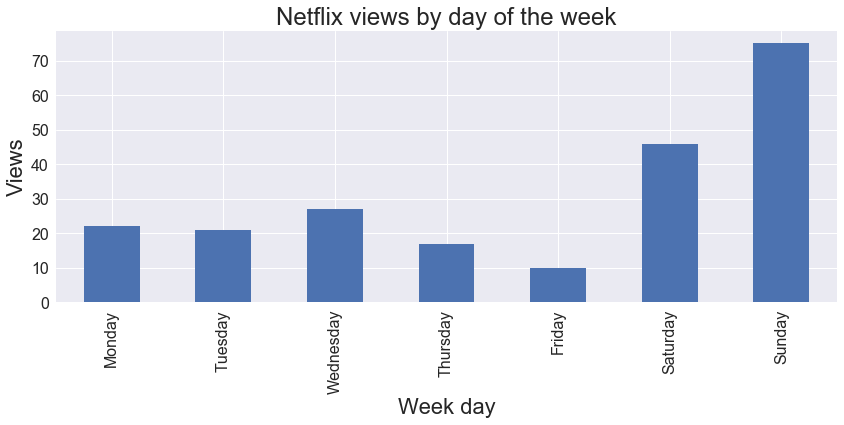

In [526]:
fig, ax = plt.subplots(figsize=(14,5))
weekday_df.plot.bar(ax=ax, legend=False);
plt.title('Netflix views by day of the week', fontsize=24);
plt.xticks(size=16);
plt.yticks(size=16);
plt.ylabel('Views',fontsize=22);
plt.xlabel('Week day',fontsize=22);

In [527]:
netflix_df['month'] = netflix_df['Date'].apply(lambda x: x.month)
netflix_df['month_name'] = netflix_df['month'].apply(lambda x: calendar.month_abbr[x])
netflix_df['month_name'] = pd.Categorical(netflix_df['month_name'],categories=
    ['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

In [528]:
month_day_views = netflix_df.groupby(['week_day_name','month_name']).Title.agg('count').unstack().fillna(0)

In [529]:
month_day_views

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
week_day_name,,,,,,,,,,,,
Monday,0.0,4.0,4.0,1.0,2.0,5.0,0.0,0.0,1.0,0.0,2.0,3.0
Tuesday,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,6.0,1.0,0.0
Wednesday,3.0,1.0,1.0,8.0,1.0,4.0,2.0,0.0,2.0,5.0,0.0,0.0
Thursday,2.0,3.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,5.0,0.0,1.0
Friday,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Saturday,10.0,7.0,9.0,3.0,1.0,3.0,0.0,3.0,0.0,3.0,7.0,0.0
Sunday,4.0,15.0,26.0,2.0,3.0,0.0,0.0,3.0,3.0,2.0,6.0,11.0


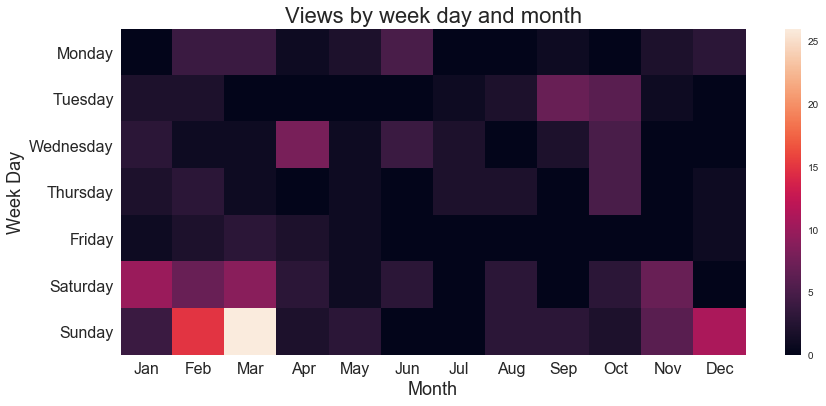

In [530]:
plt.figure(figsize=(14,6))
sns.heatmap(month_day_views)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Month',fontsize=18)
plt.ylabel('Week Day', fontsize=18)
plt.title('Views by week day and month', fontsize=22);

In [531]:
netflix_df['show'] = netflix_df['Title'].apply(lambda x: x.split(':')[0])
netflix_df['is_movie'] = netflix_df['Title'].apply(lambda x: ':' not in x)

In [532]:
show_views = netflix_df.groupby(['show','Date']).Title.agg('count').unstack()

In [533]:
# import matplotlib.dates as mdates

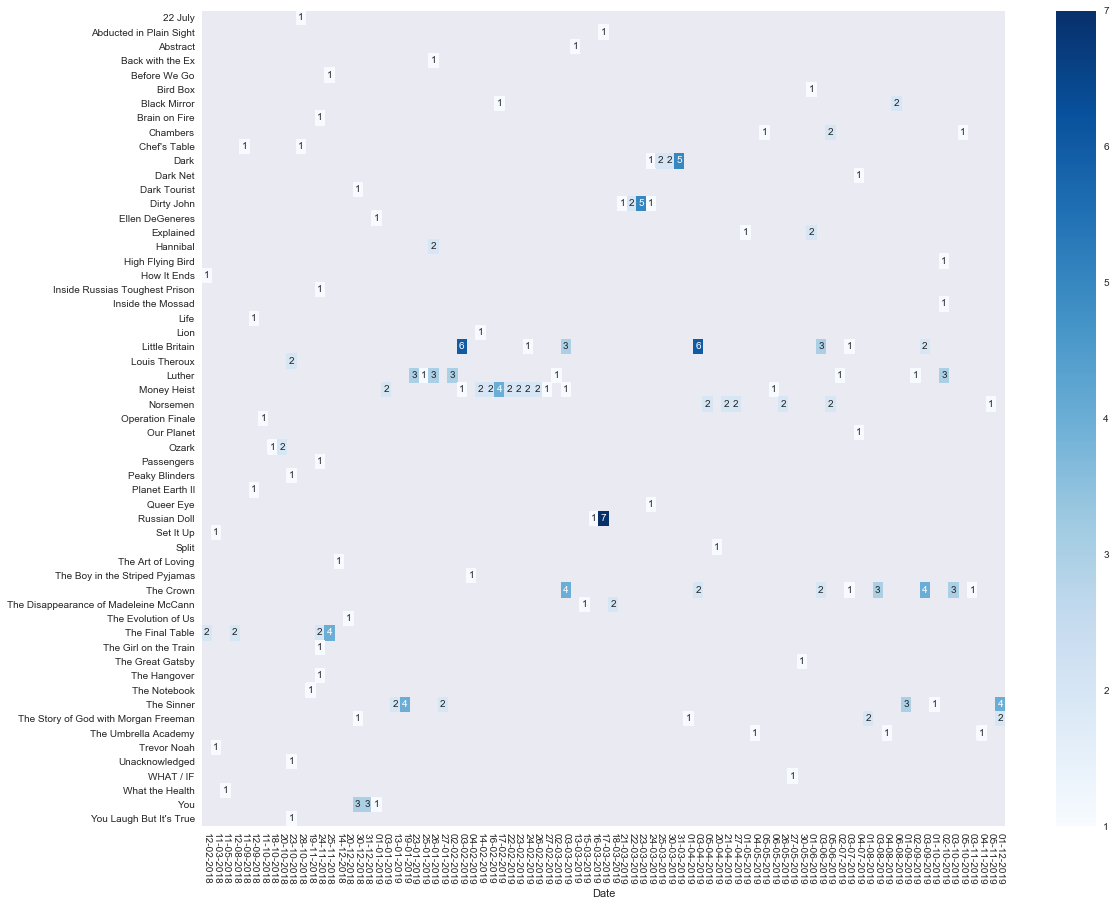

In [534]:
fig, ax = plt.subplots(figsize=(18,15));
sns.heatmap(show_views, yticklabels=True,xticklabels=True, annot=True,cmap='Blues');#YlGnBu');
ax.set_xticklabels(show_views.columns.strftime('%d-%m-%Y'));
plt.xticks(rotation=-90);
plt.ylabel('');

In [535]:
series_counts = netflix_df[~netflix_df.is_movie].groupby('show').Title.agg(['count']).sort_values(by='count',ascending=False)

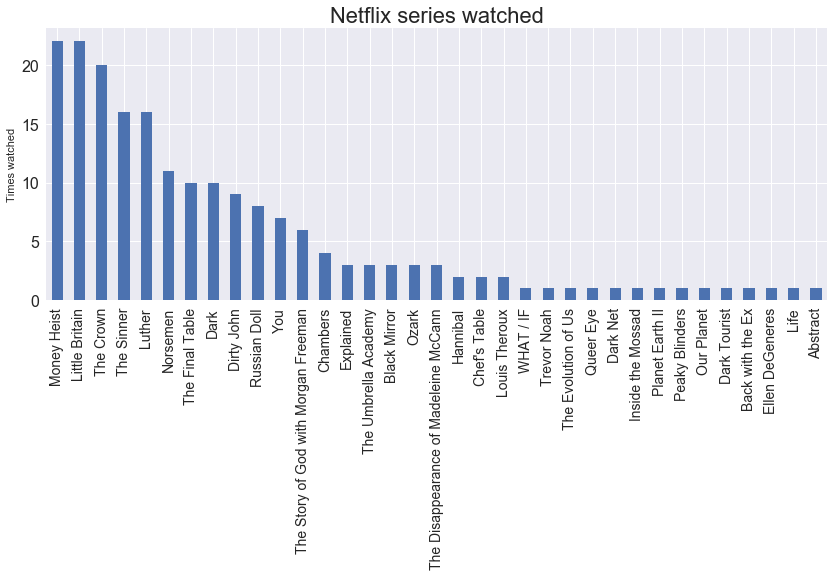

In [536]:
fig, ax = plt.subplots(figsize=(14,5));
series_counts.plot.bar(ax=ax, legend=False);
plt.xticks(fontsize=14);
plt.yticks(fontsize=16);
plt.ylabel("Times watched");
plt.xlabel("")
plt.title("Netflix series watched", fontsize=22);

In [513]:
movies = netflix_df[netflix_df.is_movie]

In [515]:
movies

,Title,Date,week_day,week_day_name,month,month_name,show,is_movie
0,The Great Gatsby,2019-05-30,3,Thursday,5,May,The Great Gatsby,True
17,Split,2019-04-20,5,Saturday,4,Apr,Split,True
23,The Boy in the Striped Pyjamas,2019-02-04,0,Monday,2,Feb,The Boy in the Striped Pyjamas,True
46,Abducted in Plain Sight,2019-03-17,6,Sunday,3,Mar,Abducted in Plain Sight,True
121,Lion,2019-02-14,3,Thursday,2,Feb,Lion,True
122,High Flying Bird,2019-10-02,2,Wednesday,10,Oct,High Flying Bird,True
166,Bird Box,2019-06-01,5,Saturday,6,Jun,Bird Box,True
180,The Art of Loving,2018-12-14,4,Friday,12,Dec,The Art of Loving,True
187,How It Ends,2018-02-12,0,Monday,2,Feb,How It Ends,True
190,Before We Go,2018-11-25,6,Sunday,11,Nov,Before We Go,True
